In [64]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_excel('./Online Retail.xlsx')

### Data Understanding

In [65]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])  # Convert InvoiceDate to datetime
# convert country to category
df['Country'] = df['Country'].astype('category')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


Data Understanding:
The data set contains transactional data of a UK-based and registered non-store online retail selling unique all-occasion gifts. The data set consists of 8 variables:

* InvoiceNo: Invoice number
* StockCode: Product code
* Description: Product name
* Quantity: Quantity of each product per transaction
* InvoiceDate: Invoice date and time
* UnitPrice: Product price per unit in sterling
* CustomerID: Customer number
* Country: Country name

Now, let's perform some data exploration tasks:

Distribution Analysis:<br>
Let's take a look at the distribution of variables in the data set.

In [66]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


From the output, we can see that:

* Quantity has a minimum value of -80995 and a maximum value of 80995, indicating that there are negative values in the data set, which could indicate returns or cancellations.
* UnitPrice has a minimum value of -11062.06, which is not possible, indicating that there may be errors in the data set.

Let's investigate further.

Suitable Transformation of Variables and Elimination of Redundant Variables:<br>
Let's transform the data set by removing any redundant variables and handling any errors.

In [67]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

### Data Preprocessing

In [68]:
# Eliminate redundant variables
df = df.drop('Description', axis=1)
df = df.drop('CustomerID', axis=1)

# Handle errors
df = df[df['Quantity']>0]
df = df[df['UnitPrice']>0]
df = df[~df['InvoiceNo'].str.contains('C')]


In this case, we removed the 'Description' variable because it is redundant, and we removed any rows with negative quantities, negative unit prices, and transactions with invoice numbers starting with 'C' (indicating cancellations).


In [69]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,530104.000000,530104.000000
mean,10.542037,3.907625
std,155.524124,35.915681
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,80995.000000,13541.330000


Outliers can distort statistical analyses and models, and hence it is a good practice to identify and remove them.

We can use box plots to visualize the distribution of the variables and identify any outliers. Let's plot box plots for 'Quantity' and 'UnitPrice' variables.

<Axes: xlabel='UnitPrice'>

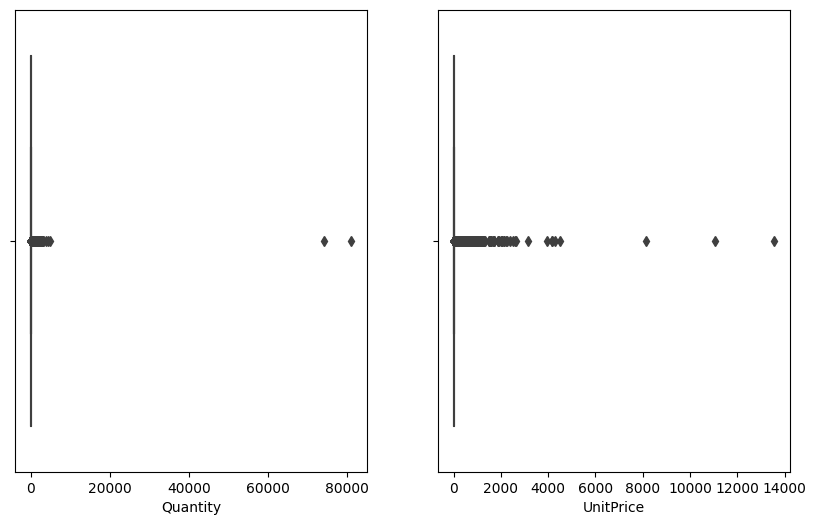

In [70]:
import seaborn as sns
fig, ax = plt.subplots(1,2,figsize=(10, 6))

# Box plot for Quantity and UnitPrice
sns.boxplot(ax = ax[0], x=df['Quantity'])
sns.boxplot(ax = ax[1], x=df['UnitPrice'])


From the box plots, we can see that both 'Quantity' and 'UnitPrice' variables have a large number of outliers.

We can use the interquartile range (IQR) method to remove outliers. The IQR is the difference between the 75th and 25th percentiles of the data. Any data point outside the range of 1.5 times the IQR below the 25th percentile or above the 75th percentile can be considered an outlier.

In [71]:
# Calculate the 95th percentile for Quantity
Q95 = df['Quantity'].quantile(0.995)

# Keep only data points below the 95th percentile for Quantity
df = df[df['Quantity'] <= Q95]

# Calculate the 95th percentile for UnitPrice
UP95 = df['UnitPrice'].quantile(0.995)

# Keep only data points below the 95th percentile for UnitPrice
df = df[df['UnitPrice'] <= UP95]


The method is effective at identifying and removing extreme values without biasing the overall distribution of the data.

In [72]:
df[['Quantity','UnitPrice']].describe()

,Quantity,UnitPrice
count,525236.000000,525236.000000
mean,8.498757,3.203093
std,15.007999,3.226830
min,1.000000,0.001000
25%,1.000000,1.250000
50%,3.000000,2.080000
75%,10.000000,4.130000
max,160.000000,24.960000


### EDA

array([[<Axes: title={'center': 'UnitPrice'}>,
        <Axes: title={'center': 'Quantity'}>]], dtype=object)

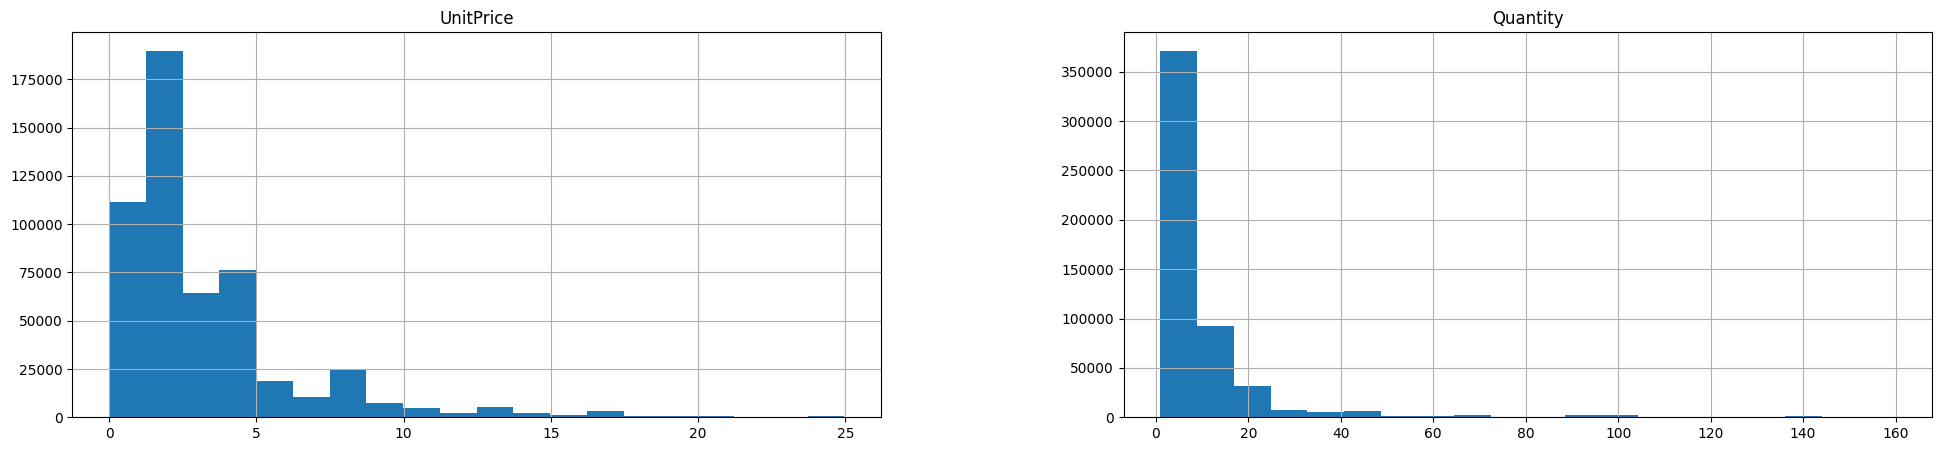

In [73]:
# Distribution analysis
df[['UnitPrice','Quantity']].hist(figsize=(24,5), bins=20)

From the histograms, we can see that:

* Quantity is heavily skewed to the right, indicating that most transactions involve small quantities of products.
* UnitPrice is also heavily skewed to the right, indicating that most products are relatively inexpensive.

<Axes: xlabel='UnitPrice'>

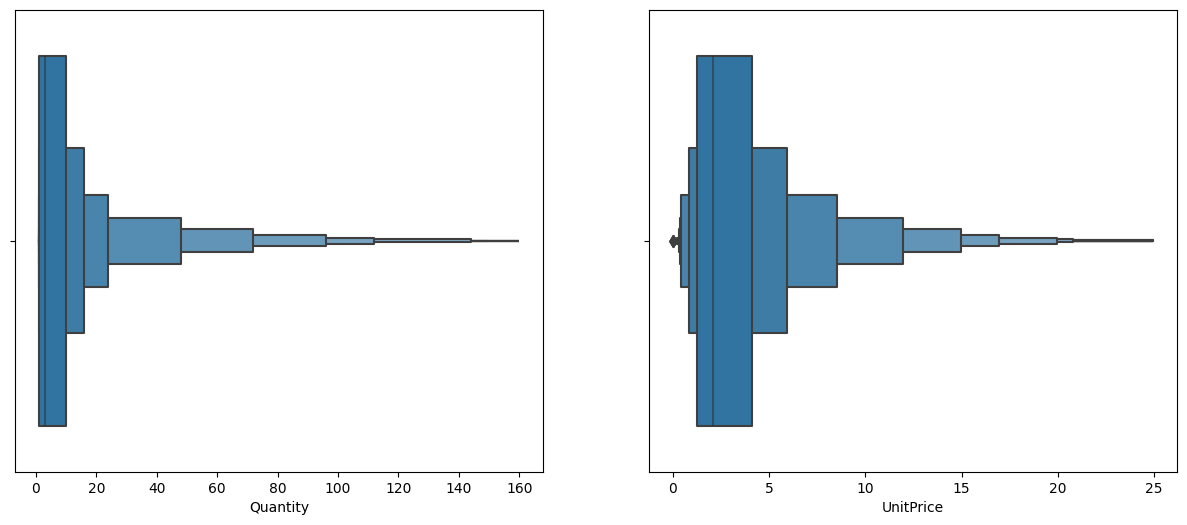

In [74]:
fig, ax = plt.subplots(1,2,figsize=(15, 6))


# boxenplot
sns.boxenplot(ax=ax[0], x='Quantity', data=df,)
sns.boxenplot(ax=ax[1], x='UnitPrice', data=df)

Management of Missing Values:<br>
Let's check for missing values in the data set.

In [75]:
# Check for missing values
df.isnull().sum()


InvoiceNo      0
StockCode      0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

From the output, we can see that the 'CustomerID' variable has 135037 missing values. We can either drop these rows or impute them with an appropriate value. For the purpose of this analysis, let's drop the rows with missing 'CustomerID' values.

In [76]:
# Drop rows with missing values
df = df.fillna(0)

In [77]:

df['total'] = df['Quantity'] * df['UnitPrice']
gdf = df[['InvoiceNo', 'InvoiceDate', 'total','Quantity']].groupby(['InvoiceNo', 'InvoiceDate']).sum()

gdf.head()


,,total,Quantity
InvoiceNo,InvoiceDate,,
536365,2010-12-01 08:26:00,139.12,40
536366,2010-12-01 08:28:00,22.20,12
536367,2010-12-01 08:34:00,278.73,83
536368,2010-12-01 08:34:00,70.05,15
536369,2010-12-01 08:35:00,17.85,3


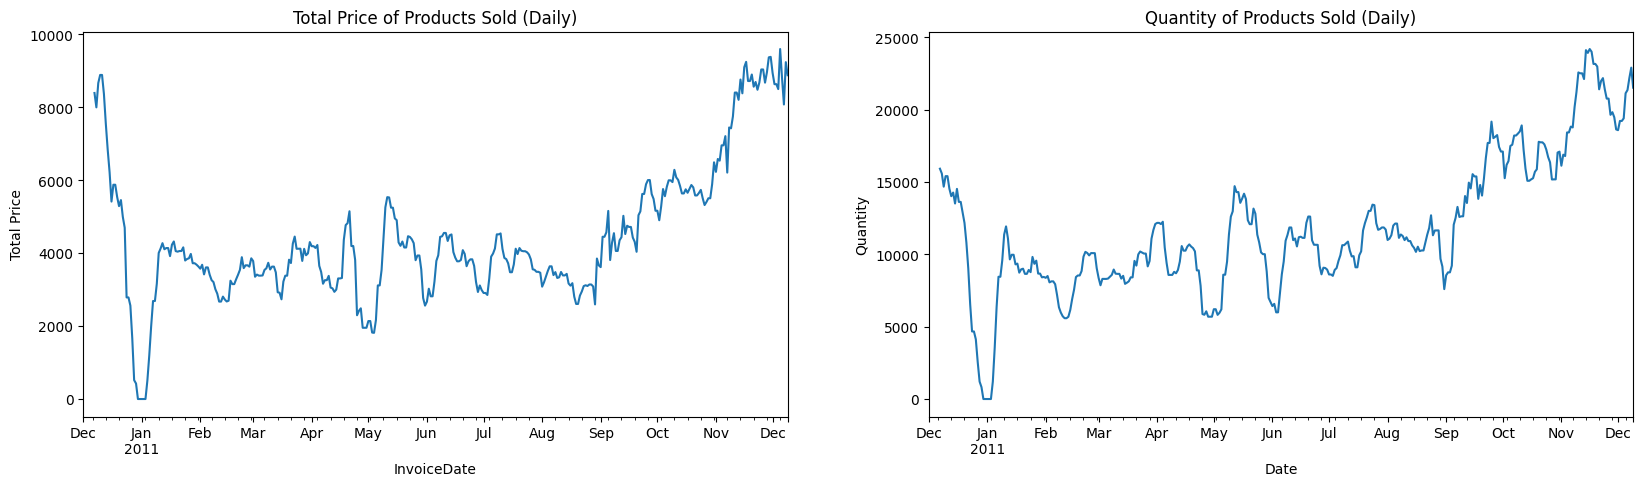

In [83]:
fig, axs = plt.subplots(1,2, figsize=(20, 5), sharex=True)

df.set_index('InvoiceDate')['UnitPrice'].resample('D').sum().rolling(window=7).mean().plot(ax=axs[0])
axs[0].set_title('Total Price of Products Sold (Daily)')
axs[0].set_ylabel('Total Price')

df.set_index('InvoiceDate')['Quantity'].resample('D').sum().rolling(window=7).mean().plot(ax=axs[1])
axs[1].set_title('Quantity of Products Sold (Daily)')
axs[1].set_xlabel('Date')
axs[1].set_ylabel('Quantity')

plt.show()


In [84]:
grouped_data = df.groupby(['Country']).agg({'Quantity': 'sum', 'UnitPrice': 'sum'})
grouped_data = grouped_data.rename(columns={'UnitPrice': 'TotalPrice'})
print(grouped_data.describe())


           Quantity    TotalPrice
count  3.800000e+01  3.800000e+01
mean   1.174698e+05  4.427315e+04
std    6.043403e+05  2.497217e+05
min    8.000000e+01  2.116000e+01
25%    1.123000e+03  3.688250e+02
50%    4.852000e+03  1.010145e+03
75%    1.784800e+04  3.278525e+03
max    3.738793e+06  1.542512e+06


In [85]:
# Checking the distribution of Quantity and UnitPrice for the top 5 countries with highest total quantity
top_countries = grouped_data.sort_values('TotalPrice', ascending=False).reset_index()
# make the country category to string 
top_countries['Country'] = top_countries['Country'].astype('str')
top_countries.head(5)

,Country,Quantity,TotalPrice
0,United Kingdom,3738793,1542511.824
1,Germany,115968,29930.180
2,France,107216,26667.730
3,EIRE,118509,25488.670
4,Spain,24942,7575.960


In [81]:
top_countries = top_countries.iloc[0:5,]

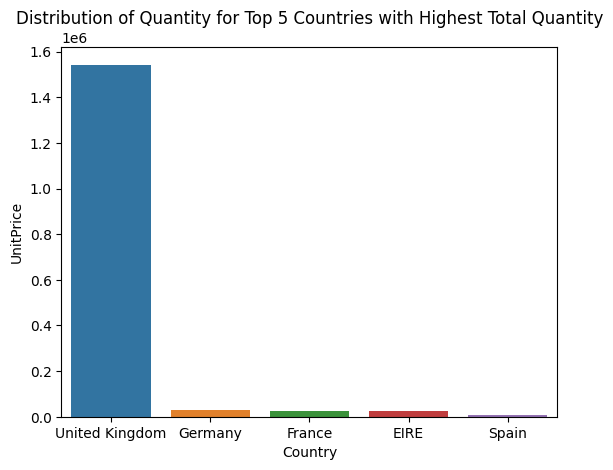

In [ ]:
sns.barplot(x='Country', y='UnitPrice', data=top_countries)
plt.title("Distribution of Quantity for Top 5 Countries with Highest Total Quantity")
plt.show()

Statistical Exploration:<br>
Let's explore some statistical relationships between variables in the data set.

C:\Users\darklane\AppData\Local\Temp\ipykernel_6632\1279981688.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

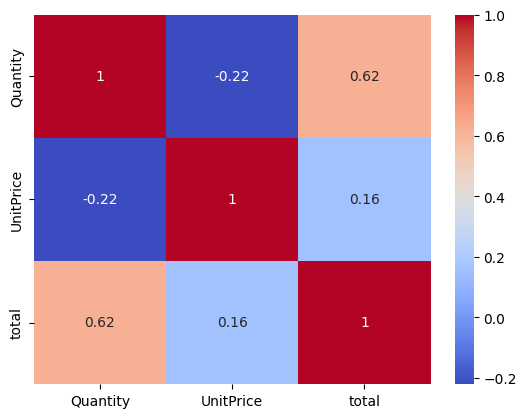

In [ ]:
# Statistical exploration
corr = df.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

From the heatmap, we can see that there is a small corralation between Quentity and the total

In [ ]:
# Group data by country
grouped_data = df.groupby('Country')

# Get the number of transactions per country
transactions_per_country = grouped_data['InvoiceNo'].nunique()

# Get the top 3 baskets (countries) based on the number of transactions
top_baskets = transactions_per_country.nlargest(3).index.tolist()

top_baskets

['United Kingdom', 'Germany', 'France']

In [ ]:
# Create separate dataframes for each country
uk_df = df[df['Country']=='United Kingdom']
de_df = df[df['Country']=='Germany']
fr_df = df[df['Country']=='France']

del gdf, df

In [ ]:
print(uk_df.shape,de_df.shape, fr_df.shape)

(481396, 7) (9009, 7) (8379, 7)


To apply the Apriori algorithm for each basket, we first need to prepare the data in the format required by the algorithm. We need to convert the transaction data into a one-hot encoded format where each row represents a single transaction and each column represents a unique item. A value of 1 in a cell indicates that the item was present in the transaction, and a value of 0 indicates that it was not.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

# Create transaction dataset for each country
def create_transaction_dataset(df):
    # Group data by InvoiceNo and StockCode
    grouped_data = df.groupby(['InvoiceNo', 'StockCode'])
    
    # Create list of unique StockCodes for each InvoiceNo
    transactions = df.groupby(['InvoiceNo'])['StockCode'].apply(list).reset_index(name='StockCode').drop('InvoiceNo', axis=1)['StockCode'].values.tolist()
        
    # # Encode the transaction dataset
    te = TransactionEncoder()
    te_data = te.fit_transform(transactions)
    transaction_df = pd.DataFrame(te_data, columns=te.columns_)
    
    return transaction_df

# Create transaction datasets for each country
uk_df_transaction = create_transaction_dataset(uk_df)
de_df_transaction = create_transaction_dataset(de_df)
fr_df_transaction = create_transaction_dataset(fr_df)

We can now apply the Apriori algorithm to each of the one-hot encoded data sets to extract frequent itemsets.

In [104]:
from mlxtend.frequent_patterns import apriori

# Set minimum support threshold
uk_min_support = 0.02
de_min_support = 0.03
fr_min_support = 0.04


# Generate frequent itemsets for each country
uk_frequent_itemsets = apriori(uk_df_transaction, min_support=uk_min_support, use_colnames=True)
de_frequent_itemsets = apriori(de_df_transaction, min_support=de_min_support, use_colnames=True)
fr_frequent_itemsets = apriori(fr_df_transaction, min_support=fr_min_support, use_colnames=True)

uk_frequent_itemsets['length'] = uk_frequent_itemsets['itemsets'].apply(lambda x: len(x))
de_frequent_itemsets['length'] = de_frequent_itemsets['itemsets'].apply(lambda x: len(x))
fr_frequent_itemsets['length'] = fr_frequent_itemsets['itemsets'].apply(lambda x: len(x))


Now that we have extracted frequent itemsets for each basket, we can analyze the business value of each basket. This can be done by identifying the most frequent itemsets in each basket and analyzing the relationship between them. For example, if certain items are frequently purchased together, it may indicate a complementary relationship between the items. This information can be used to improve product bundling and cross-selling strategies.

Additionally, we can use association rules to analyze the relationship between different itemsets and identify strong rules that can be used to drive business value. For example, we may find that customers who purchase a certain item are highly likely to also purchase a related item. This information can be used to drive targeted marketing and promotions.

In [105]:
uk_frequent_itemsets[(uk_frequent_itemsets['length']  > 1)].sort_values(by='support', ascending=False).reset_index(drop=True).head(10)

,support,itemsets,length
0,0.043205,"(22386, 85099B)",2
1,0.039524,"(22697, 22699)",2
2,0.039128,"(85099B, 21931)",2
3,0.037033,"(85099B, 22411)",2
4,0.034371,"(20727, 20725)",2
5,0.034088,"(20725, 22383)",2
6,0.032559,"(22697, 22698)",2
7,0.031993,"(20727, 22383)",2
8,0.031710,"(22727, 22726)",2
9,0.031540,"(85099B, 85099C)",2


In [106]:
de_frequent_itemsets[(de_frequent_itemsets['length']  > 1)].sort_values(by='support', ascending=False).reset_index(drop=True).head(10)

,support,itemsets,length
0,0.229399,"(POST, 22326)",2
1,0.153675,"(22328, POST)",2
2,0.133630,"(22328, 22326)",2
3,0.126949,"(22328, POST, 22326)",3
4,0.120267,"(22423, POST)",2
5,0.118040,"(POST, 20719)",2
6,0.118040,"(POST, 22554)",2
7,0.102450,"(POST, 22551)",2
8,0.100223,"(22556, POST)",2
9,0.093541,"(POST, 22077)",2


In [107]:
fr_frequent_itemsets[(fr_frequent_itemsets['length']  > 1)].sort_values(by='support', ascending=False).reset_index(drop=True).head(10)

,support,itemsets,length
0,0.160622,"(POST, 21731)",2
1,0.160622,"(23084, POST)",2
2,0.147668,"(22556, POST)",2
3,0.147668,"(POST, 22326)",2
4,0.137306,"(POST, 22554)",2
5,0.124352,"(21086, 21094)",2
6,0.121762,"(POST, 20725)",2
7,0.116580,"(20750, POST)",2
8,0.116580,"(POST, 21559)",2
9,0.116580,"(POST, 22352)",2


In [112]:
from mlxtend.frequent_patterns import association_rules

uk_association_rules = association_rules(uk_frequent_itemsets, metric="confidence", min_threshold=0.2, support_only=False)
uk_association_rules = uk_association_rules[uk_association_rules['lift'] > 1.2].sort_values(by=['lift'], ascending=False)
uk_association_rules.head()


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
158,(22577),(22578),0.028539,0.026784,0.020612,0.722222,26.964999,0.019847,3.503579,0.991203
159,(22578),(22577),0.026784,0.028539,0.020612,0.769556,26.964999,0.019847,4.215606,0.989415
233,(22698),"(22697, 22699)",0.039694,0.039524,0.027746,0.699001,17.685337,0.026177,3.190964,0.982454
228,"(22697, 22699)",(22698),0.039524,0.039694,0.027746,0.702006,17.685337,0.026177,3.222565,0.982280
231,(22697),"(22698, 22699)",0.052718,0.030747,0.027746,0.526316,17.117379,0.026125,2.046200,0.993981


In [114]:
de_association_rules = association_rules(uk_frequent_itemsets, metric="confidence", min_threshold=0.4, support_only=False)
de_association_rules = de_association_rules[de_association_rules['lift'] > 1.2].sort_values(by=['lift'], ascending=False)
de_association_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
97,(22577),(22578),0.028539,0.026784,0.020612,0.722222,26.964999,0.019847,3.503579,0.991203
98,(22578),(22577),0.026784,0.028539,0.020612,0.769556,26.964999,0.019847,4.215606,0.989415
150,(22698),"(22697, 22699)",0.039694,0.039524,0.027746,0.699001,17.685337,0.026177,3.190964,0.982454
145,"(22697, 22699)",(22698),0.039524,0.039694,0.027746,0.702006,17.685337,0.026177,3.222565,0.982280
147,"(22698, 22699)",(22697),0.030747,0.052718,0.027746,0.902394,17.117379,0.026125,9.705172,0.971449


In [115]:
fr_association_rules = association_rules(uk_frequent_itemsets, metric="confidence", min_threshold=0.4, support_only=False)
fr_association_rules = fr_association_rules[fr_association_rules['lift'] > 1.2].sort_values(by=['lift'], ascending=False)
fr_association_rules.head()

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
97,(22577),(22578),0.028539,0.026784,0.020612,0.722222,26.964999,0.019847,3.503579,0.991203
98,(22578),(22577),0.026784,0.028539,0.020612,0.769556,26.964999,0.019847,4.215606,0.989415
150,(22698),"(22697, 22699)",0.039694,0.039524,0.027746,0.699001,17.685337,0.026177,3.190964,0.982454
145,"(22697, 22699)",(22698),0.039524,0.039694,0.027746,0.702006,17.685337,0.026177,3.222565,0.982280
147,"(22698, 22699)",(22697),0.030747,0.052718,0.027746,0.902394,17.117379,0.026125,9.705172,0.971449
